# TP4: Clustering companies by their daily stock price movements. 
In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day).  You are given a NumPy array `movements` of daily price movements from 2010 to 2015, where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others.  To account for this, include a `Normalizer` at the beginning of your pipeline.  The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.



**Step 1:** Load the data (stocks.csv); put `index_col` equal to 0

In [1]:
import pandas as pd

df = pd.read_csv('dataset/stocks.csv', index_col=0)

**Step 2:** Inspect the first few rows of the DataFrame `stocks_df` by calling its `head()` function.

In [2]:
df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


**Step 3:** Extract the stocks `movements` values from the DataFrame and the list of company names 

In [3]:
movements = df.values
companies = df.index
companies

Index(['Apple', 'AIG', 'Amazon', 'American express', 'Boeing',
       'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar',
       'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron',
       'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics',
       'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot',
       'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase',
       'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard',
       'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar',
       'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble',
       'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony',
       'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total',
       'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever',
       'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon',
       'Xerox', 'Yahoo'],
      dtype='object')

**Step 4:** Make the necessary imports:

- `Normalizer` from `sklearn.preprocessing`.
- `KMeans` from `sklearn.cluster`.
- `make_pipeline` from `sklearn.pipeline`.

In [4]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

**Step 5:** Create an instance of `KMeans` called `kmeans` with `k` clusters; the range of `k` is [3,15]. Find the inertias for each values of `k`. Plot `inertia` and `k`. Select the best `k` based on inertia values.

3 : 0.7868009495742608
4 : 0.8024122150235055
5 : 0.7331165507845193
6 : 0.6235818374412094
7 : 0.2934569796611876
8 : 0.18796725418426166
9 : 0.16759122607778532
10 : 0.15865326028936047
11 : 0.0885550843100485
12 : 0.1371902582010726
13 : 0.16947943050818717
14 : 0.09859755097834325


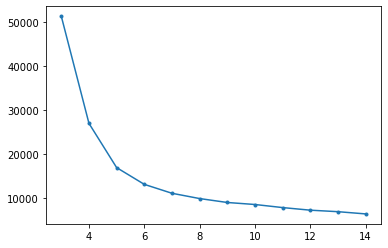

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

inertias = []
for k in range(3,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(movements)
    inertias.append(kmeans.inertia_)
    print(k, ':', silhouette_score(movements, kmeans.predict(movements)))

plt.plot(range(3,15), inertias, '.-');

**Step 6:**  Create a `KMeans` model using the selected `k`. Get the labels. What do you observe?

In [6]:
kmeans = KMeans(n_clusters=6)
labels = kmeans.fit_predict(movements)

**Step 7:**  Create an instance of `Normalizer`. Using make_pipeline(), create a pipeline called pipeline that chains normalizer and kmeans.

In [7]:
normalizer = Normalizer()
pipeline = make_pipeline(normalizer, kmeans)

**Step 8:** Fit the pipeline to the movements array.

In [8]:
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()), ('kmeans', KMeans(n_clusters=6))])

**Step 9:** Use the .predict() method of the pipeline to predict the labels for movements.

In [9]:
labels = pipeline.predict(movements)

**Step 10:** Align the cluster labels with the list of company names `companies` by creating a DataFrame `df` with `labels` and `companies` as columns.

In [10]:
df_ = pd.DataFrame({'companies': companies, 'labels': labels})

**Step 11:** Display the DataFrame, sorted by cluster label.  To do this, use the `.sort_values()` method of `df` to sort the DataFrame by the `'labels'` column.

In [11]:
df_.sort_values('labels')

,companies,labels
1,AIG,0
55,Wells Fargo,0
3,American express,0
5,Bank of America,0
30,MasterCard,0
26,JPMorgan Chase,0
20,Home Depot,0
18,Goldman Sachs,0
17,Google/Alphabet,0
0,Apple,1
